## TMDB Movie Data Anlysis using Pandas and APIs

In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from utils import *


sys.setrecursionlimit(10000) 

In [ ]:
#declare constant variables
BASE_URL = "https://api.themoviedb.org/3/movie/"
API_ACCESS_TOKEN = os.environ.get('API_ACCESS_TOKEN')
HEADERS = {
    "accept": "application/json",
    "Authorization": f"Bearer {API_ACCESS_TOKEN}"
}
movie_ids = [0, 299534, 19995, 140607, 299536, 597, 135397, 420818, 24428, 168259, 99861, 284054, 12445,181808, 330457, 351286, 109445, 321612, 260513]

In [39]:
internet_connection = True
movies_df =pd.DataFrame()
credits_df = pd.DataFrame()

### Fetching movie data from TMDB Movie Databse API

In [ ]:
if (internet_connection != False):
    movies_df, credits_df = get_all_data(BASE_URL, movie_ids, HEADERS)
    movies_df.to_json('./datasets/movies_raw_data.json')
    credits_df.to_json('./datasets/credits_raw_data.json')
else:
    movies_df = pd.read_json('./datasets/movies_raw_data.json')  
    credits_df = pd.read_json('./datasets/credits_raw_data.json')

Error occured trying to fetch from api route: https://api.themoviedb.org/3/movie/0. 
Error Status Code: 401
Error occured trying to fetch from api route: https://api.themoviedb.org/3/movie/0/credits. 
Error Status Code: 401
Error occured trying to fetch from api route: https://api.themoviedb.org/3/movie/299534. 
Error Status Code: 401
Error occured trying to fetch from api route: https://api.themoviedb.org/3/movie/299534/credits. 
Error Status Code: 401
Error occured trying to fetch from api route: https://api.themoviedb.org/3/movie/19995. 
Error Status Code: 401
Error occured trying to fetch from api route: https://api.themoviedb.org/3/movie/19995/credits. 
Error Status Code: 401
Error occured trying to fetch from api route: https://api.themoviedb.org/3/movie/140607. 
Error Status Code: 401
Error occured trying to fetch from api route: https://api.themoviedb.org/3/movie/140607/credits. 
Error Status Code: 401
Error occured trying to fetch from api route: https://api.themoviedb.org/3/m

## Data Cleaning and Preprocessing

In [6]:
#Dropping irrelevant columns
# movies_df
columns_to_drop = ['adult', 'original_title', 'imdb_id', 'video', 'homepage']
movies_df = drop_cols(movies_df, columns_to_drop)


In [7]:
movies_df

,backdrop_path,belongs_to_collection,budget,genres,id,origin_country,original_language,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",356000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",299534,[US],en,After the devastating events of Avengers: Infi...,22.2597,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2019-04-24,2799439100,181,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Avenge the fallen.,Avengers: Endgame,8.238,26207
1,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995,[US],en,"In the 22nd century, a paraplegic Marine is di...",31.3525,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-15,2923706026,162,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Enter the world of Pandora.,Avatar,7.588,32112
2,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...",245000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",140607,[US],en,Thirty years after defeating the Galactic Empi...,12.7841,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2015-12-15,2068223624,136,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Every generation has a story.,Star Wars: The Force Awakens,7.262,19665
3,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",299536,[US],en,As the Avengers and their allies have continue...,32.6907,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2018-04-25,2052415039,149,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Destiny arrives all the same.,Avengers: Infinity War,8.236,30386
4,/sCzcYW9h55WcesOqA12cgEr9Exw.jpg,None,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",597,[US],en,101-year-old Rose DeWitt Bukater tells the sto...,31.6333,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1997-11-18,2264162353,194,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Nothing on Earth could come between them.,Titanic,7.905,25867
5,/aIGIYJTyOkEVUmEd3z5x6diYsFx.jpg,"{'id': 328, 'name': 'Jurassic Park Collection'...",150000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",135397,[US],en,Twenty-two years after the events of Jurassic ...,19.5099,/rhr4y79GpxQF9IsfJItRXVaoGs4.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2015-06-06,1671537444,124,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The park is open.,Jurassic World,6.700,20623
6,/1TUg5pO1VZ4B0Q1amk3OlXvlpXV.jpg,"{'id': 762512, 'name': 'The Lion King (Reboot)...",260000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",420818,[US],en,"Simba idolizes his father, King Mufasa, and ta...",22.2842,/dzBtMocZuJbjLOXvrl4zGYigDzh.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2019-07-12,1662020819,118,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The king has returned.,The Lion King,7.109,10301
7,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",24428,[US],en,When an unexpected enemy emerges and threatens...,33.8215,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2012-04-25,1518815515,143,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,7.734,31505
8,/cHkhb5A4gQRK6zs6Pv7zorHs8Nk.jpg,"{'id': 9485, 'name': 'The Fast and the Furious...",190000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",168259,[US],en,Deckard Shaw seeks revenge ag

### Evalutaing json-like columns and extracting and cleaning key data points

In [ ]:
#evaluating json-like columns in movie_df
movies_df = eval_movies_json_col(movies_df)

In [ ]:
# #evaluating json-like columns in credits_df
credits_df = eval_credits_json_col(credits_df)



credits_df = drop_cols(credits_df, 'crew')
credits_df

,id,cast,cast_size,director,crew_size
0,299534,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,1496,Anthony Russo,593
1,19995,Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...,943,James Cameron,986
2,140607,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,2585,J.J. Abrams,257
3,299536,Robert Downey Jr.|Chris Evans|Chris Hemsworth|...,1010,Joe Russo,724
4,597,Leonardo DiCaprio|Kate Winslet|Billy Zane|Kath...,1621,James Cameron,258
5,135397,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,734,Colin Trevorrow,423
6,420818,Chiwetel Ejiofor|John Oliver|Donald Glover|Jam...,279,Jon Favreau,44
7,24428,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,1658,Joss Whedon,631
8,168259,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,648,James Wan,222
9,99861,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,1044,Joss Whedon,636


In [10]:
movies_df[['genres', 'belongs_to_collection', 'production_companies', 'production_countries', 'spoken_languages','origin_country']].value_counts(dropna=False)

credits_df[['cast', 'crew_size', "director", 'cast_size']].value_counts(dropna=False)



cast                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [ ]:
combined_df = merge_dfs(movies_df, credits_df, 'id')

### Getting Unique Column Values

In [12]:
def unique_col_value(df):
    unique_cols = {}
    unique_genres = set()
    df['genres'].dropna().apply(lambda genre_list: unique_genres.update(genre_list.split('|')))
    unique_cols['genres'] = unique_genres

    unique_production_companies = set()
    df['production_companies'].dropna().apply(lambda production_companies: unique_production_companies.update(production_companies.split('|')))
    unique_cols['production_companies'] = unique_production_companies

    unique_production_countries = set()
    df['production_countries'].dropna().apply(lambda production_countries: unique_production_countries.update(production_countries.split('|')))
    unique_cols['production_countries'] = unique_production_countries

    unique_spoken_languages = set()
    df['spoken_languages'].dropna().apply(lambda spoken_languages: unique_spoken_languages.update(spoken_languages.split('|')))
    unique_cols['spoken_languages'] = unique_spoken_languages

    return unique_cols
    

unique_cols = unique_col_value(combined_df)
unique_cols


{'genres': {'Action',
  'Adventure',
  'Animation',
  'Comedy',
  'Crime',
  'Drama',
  'Family',
  'Fantasy',
  'Romance',
  'Science Fiction',
  'Thriller'},
 'production_companies': {'20th Century Fox',
  'Amblin Entertainment',
  'Bad Robot',
  'Dune Entertainment',
  'Fairview Entertainment',
  'Heyday Films',
  'Ingenious Media',
  'Lightstorm Entertainment',
  'Lucasfilm Ltd.',
  'Mandeville Films',
  'Marvel Studios',
  'One Race',
  'Original Film',
  'Paramount Pictures',
  'Pixar',
  'Universal Pictures',
  'Walt Disney Animation Studios',
  'Walt Disney Pictures',
  'Warner Bros. Pictures'},
 'production_countries': {'United Kingdom', 'United States of America'},
 'spoken_languages': {'Arabic',
  'English',
  'French',
  'German',
  'Hindi',
  'Italian',
  'Japanese',
  'Korean',
  'Russian',
  'Spanish',
  'Swahili',
  'Swedish',
  'Thai',
  'Xhosa'}}

In [ ]:
# Coverting columns to specific datatypes
combined_df = convert_datatypes(combined_df)


## Handling Missing and Incorrect Data

In [ ]:
## Replacing invalid data with Nan
cols_with_zero_val = ['budget', 'revenue', 'runtime']
cols_with_placeholders = ['overview', 'tagline']
cols_to_musd = ['revenue', 'budget']

combined_df = replace_with_nan(combined_df, cols_with_zero_val)
combined_df = replace_known_placeholders(combined_df, cols_with_placeholders)

combined_df = convert_to_milions(combined_df, cols_to_musd)



#Drop Duplicate
combined_df.drop_duplicates(inplace=True, ignore_index=True)

#drop unknown id and title
combined_df.dropna(how='any', subset=['id', 'title'], ignore_index=True, inplace=True)

#kekep only roow where at least 1- columns have non_Non values
combined_df.dropna(thresh=10, ignore_index=True, inplace=True)

# filter to include only released movies
combined_df = combined_df[movies_df['status']=='Released']
#drop status column
combined_df = drop_cols(combined_df, 'status')
combined_df

,backdrop_path,belongs_to_collection,budget_musd,genres,id,origin_country,original_language,overview,popularity,poster_path,...,runtime,spoken_languages,tagline,title,vote_average,vote_count,cast,cast_size,director,crew_size
0,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,The Avengers Collection,356.0,Adventure|Science Fiction|Action,299534,US,en,After the devastating events of Avengers: Infi...,22.2597,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,...,181,English|Japanese|Xhosa,Avenge the fallen.,Avengers: Endgame,8.238,26207,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,1496,Anthony Russo,593
1,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,Avatar Collection,237.0,Action|Adventure|Fantasy|Science Fiction,19995,US,en,"In the 22nd century, a paraplegic Marine is di...",31.3525,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,...,162,English|Spanish,Enter the world of Pandora.,Avatar,7.588,32112,Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...,943,James Cameron,986
2,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg,Star Wars Collection,245.0,Adventure|Action|Science Fiction,140607,US,en,Thirty years after defeating the Galactic Empi...,12.7841,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,...,136,English,Every generation has a story.,Star Wars: The Force Awakens,7.262,19665,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,2585,J.J. Abrams,257
3,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,The Avengers Collection,300.0,Adventure|Action|Science Fiction,299536,US,en,As the Avengers and their allies have continue...,32.6907,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,...,149,English|Xhosa,Destiny arrives all the same.,Avengers: Infinity War,8.236,30386,Robert Downey Jr.|Chris Evans|Chris Hemsworth|...,1010,Joe Russo,724
4,/sCzcYW9h55WcesOqA12cgEr9Exw.jpg,None,200.0,Drama|Romance,597,US,en,101-year-old Rose DeWitt Bukater tells the sto...,31.6333,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,...,194,English|French|German|Swedish|Italian|Russian,Nothing on Earth could come between them.,Titanic,7.905,25867,Leonardo DiCaprio|Kate Winslet|Billy Zane|Kath...,1621,James Cameron,258
5,/aIGIYJTyOkEVUmEd3z5x6diYsFx.jpg,Jurassic Park Collection,150.0,Action|Adventure|Science Fiction|Thriller,135397,US,en,Twenty-two years after the events of Jurassic ...,19.5099,/rhr4y79GpxQF9IsfJItRXVaoGs4.jpg,...,124,English,The park is open.,Jurassic World,6.700,20623,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,734,Colin Trevorrow,423
6,/1TUg5pO1VZ4B0Q1amk3OlXvlpXV.jpg,The Lion King (Reboot) Collection,260.0,Adventure|Drama|Family|Animation,420818,US,en,"Simba idolizes his father, King Mufasa, and ta...",22.2842,/dzBtMocZuJbjLOXvrl4zGYigDzh.jpg,...,118,English,The king has returned.,The Lion King,7.109,10301,Chiwetel Ejiofor|John Oliver|Donald Glover|Jam...,279,Jon Favreau,44
7,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,The Avengers Collection,220.0,Science Fiction|Action|Adventure,24428,US,en,When an unexpected enemy emerges and threatens...,33.8215,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,...,143,English|Hindi|Russian,Some assembly required.,The Avengers,7.734,31505,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,1658,Joss Whedon,631
8,/cHkhb5A4gQRK6zs6Pv7zorHs8Nk.jpg,The Fast and the Furious Collection,190.0,Action|Thriller|Crime,168259,US,en,Deckard Shaw seeks revenge against Dominic Tor...,14.2561,/wurKlC3VKUgcfsn0K51MJYEleS2.jpg,...,137,Arabic|English|Spanish|Thai,Vengeance hits home.,Furious 7,7.225,10761,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,648,James Wan,222
9,/6YwkGolwdOMNpbTOmLjoehlVWs5.jpg,The Avengers Collection,365.0,Action|Adventure|Science Fiction,99861,US,en,When Tony Stark tries to jumpstart a dormant p...,17.2051,/4ssDuvEDkSArWEdyBl2X5EHvYKU.jpg,...,141,English,A new age has come.,Avengers: Age of Ultron,7.271,23345,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,1044,Joss Whedon,636


In [ ]:
# Replacing Movies with vote_count = 0 with avearge count per genre
combined_df = replace_zero_count_vote(combined_df)
combined_df


,backdrop_path,belongs_to_collection,budget_musd,genres,id,origin_country,original_language,overview,popularity,poster_path,...,runtime,spoken_languages,tagline,title,vote_average,vote_count,cast,cast_size,director,crew_size
0,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,The Avengers Collection,356.0,Adventure|Science Fiction|Action,299534,US,en,After the devastating events of Avengers: Infi...,22.2597,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,...,181,English|Japanese|Xhosa,Avenge the fallen.,Avengers: Endgame,8.238,26207.0,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,1496,Anthony Russo,593
1,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,Avatar Collection,237.0,Action|Adventure|Fantasy|Science Fiction,19995,US,en,"In the 22nd century, a paraplegic Marine is di...",31.3525,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,...,162,English|Spanish,Enter the world of Pandora.,Avatar,7.588,32112.0,Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...,943,James Cameron,986
2,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg,Star Wars Collection,245.0,Adventure|Action|Science Fiction,140607,US,en,Thirty years after defeating the Galactic Empi...,12.7841,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,...,136,English,Every generation has a story.,Star Wars: The Force Awakens,7.262,19665.0,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,2585,J.J. Abrams,257
3,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,The Avengers Collection,300.0,Adventure|Action|Science Fiction,299536,US,en,As the Avengers and their allies have continue...,32.6907,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,...,149,English|Xhosa,Destiny arrives all the same.,Avengers: Infinity War,8.236,30386.0,Robert Downey Jr.|Chris Evans|Chris Hemsworth|...,1010,Joe Russo,724
4,/sCzcYW9h55WcesOqA12cgEr9Exw.jpg,None,200.0,Drama|Romance,597,US,en,101-year-old Rose DeWitt Bukater tells the sto...,31.6333,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,...,194,English|French|German|Swedish|Italian|Russian,Nothing on Earth could come between them.,Titanic,7.905,25867.0,Leonardo DiCaprio|Kate Winslet|Billy Zane|Kath...,1621,James Cameron,258
5,/aIGIYJTyOkEVUmEd3z5x6diYsFx.jpg,Jurassic Park Collection,150.0,Action|Adventure|Science Fiction|Thriller,135397,US,en,Twenty-two years after the events of Jurassic ...,19.5099,/rhr4y79GpxQF9IsfJItRXVaoGs4.jpg,...,124,English,The park is open.,Jurassic World,6.700,20623.0,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,734,Colin Trevorrow,423
6,/1TUg5pO1VZ4B0Q1amk3OlXvlpXV.jpg,The Lion King (Reboot) Collection,260.0,Adventure|Drama|Family|Animation,420818,US,en,"Simba idolizes his father, King Mufasa, and ta...",22.2842,/dzBtMocZuJbjLOXvrl4zGYigDzh.jpg,...,118,English,The king has returned.,The Lion King,7.109,10301.0,Chiwetel Ejiofor|John Oliver|Donald Glover|Jam...,279,Jon Favreau,44
7,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,The Avengers Collection,220.0,Science Fiction|Action|Adventure,24428,US,en,When an unexpected enemy emerges and threatens...,33.8215,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,...,143,English|Hindi|Russian,Some assembly required.,The Avengers,7.734,31505.0,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,1658,Joss Whedon,631
8,/cHkhb5A4gQRK6zs6Pv7zorHs8Nk.jpg,The Fast and the Furious Collection,190.0,Action|Thriller|Crime,168259,US,en,Deckard Shaw seeks revenge against Dominic Tor...,14.2561,/wurKlC3VKUgcfsn0K51MJYEleS2.jpg,...,137,Arabic|English|Spanish|Thai,Vengeance hits home.,Furious 7,7.225,10761.0,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,648,James Wan,222
9,/6YwkGolwdOMNpbTOmLjoehlVWs5.jpg,The Avengers Collection,365.0,Action|Adventure|Science Fiction,99861,US,en,When Tony Stark tries to jumpstart a dormant p...,17.2051,/4ssDuvEDkSArWEdyBl2X5EHvYKU.jpg,...,141,English,A new age has come.,Avengers: Age of Ultron,7.271,23345.0,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,1044,Joss Whedon,636


In [ ]:
#reorder columns and reindex
reordered_df = reorder_col_and_reindex(combined_df)
reordered_df

NameError: name 'combined_df' is not defined

## KPI Implementation & Analysis

### Identifying the Best/Wok Performing Movies

In [ ]:
# Finding the highest Rank
def kpi_implementation(df):
    kpi_results = {}

    #movie with the highest revenue
    kpi_results['highest_revenue'] = rank_movies_with_col(df, 'revenue_musd')['title'].iloc[0]

    #movie with the highest budget
    kpi_results['highest_budget'] = rank_movies_with_col(df, 'budget_musd')['title'].iloc[0]

    #movie with the highest and lowest profit
    df['profit_musd'] = df['revenue_musd'] - df['budget_musd'] #a column for profit
    kpi_results['highest_profit'] = rank_movies_with_col(df, 'profit_musd')['title'].iloc[0]
    kpi_results['lowest_profit'] = rank_movies_with_col(df, 'profit_musd', asc=True)['title'].iloc[0]

    #movie with the highest vote count
    kpi_results['most_voted'] = rank_movies_with_col(df, 'vote_count')['title'].iloc[0]

     #movie with the highest popularity
    kpi_results['most_pupular'] = rank_movies_with_col(df, 'popularity')['title'].iloc[0]
 
    #movie with the highest and lowest roi
    filtered_df = cal_roi(df) # generate a df with roi column 
    kpi_results['highest_roi'] = rank_movies_with_col(filtered_df, 'roi_musd')['title'].iloc[0]
    kpi_results['lowest_roi'] = rank_movies_with_col(filtered_df, 'roi_musd', asc=True)['title'].iloc[0]

    #movie with the highest and lowest profit
    filtered_df = df[df['vote_count']>=10].copy()
    kpi_results['highest_rated'] = rank_movies_with_col(filtered_df, 'vote_average')['title'].iloc[0]
    kpi_results['lowest_rated'] = rank_movies_with_col(filtered_df, 'vote_average', asc=True)['title'].iloc[0]

    return kpi_results


kpi_implementation(reordered_df)


{'highest_revenue': 'Avatar',
 'highest_budget': 'Avengers: Age of Ultron',
 'highest_profit': 'Avatar',
 'lowest_profit': 'Avengers: Age of Ultron',
 'most_voted': 'Avatar',
 'most_pupular': 'The Avengers',
 'highest_roi': 'Avatar',
 'lowest_roi': 'Avengers: Age of Ultron',
 'highest_rated': 'Avengers: Endgame',
 'lowest_rated': 'Jurassic World: Fallen Kingdom'}

## Advanced Movie Filtering and Search Queries

In [34]:
# Best-rated Science Fiction Action movies starring Bruce Willis (sorted by rating-highest to lowest)
science_fiction_action_genres = reordered_df[reordered_df['genres'].apply(
    lambda genres : set({'Science Fiction', 'Action'}).issubset(set(genres.split('|')))
)]
science_fiction_action_genres = science_fiction_action_genres[science_fiction_action_genres['cast'].str.contains('Bruce Willis', na=False)]
best_science_fiction_action_genres = rank_movies_with_col(science_fiction_action_genres, 'vote_average')['title']
best_science_fiction_action_genres


Series([], Name: title, dtype: object)

In [35]:

# movies staring Uma Thurman, directed  by Quentin Tarantino
movie_starring_and_directed_specific_persons = reordered_df[
    reordered_df['cast'].str.contains('Uma Thurman', na=False) & reordered_df['director'].str.contains('Quentin Tarantino', na=False)
    ]
movie_starring_and_directed_specific_persons_rank_by_runtime = rank_movies_with_col(movie_starring_and_directed_specific_persons, 'runtime', asc=True)['title']
movie_starring_and_directed_specific_persons_rank_by_runtime

Series([], Name: title, dtype: object)

### Most Succesful Directors Based on :

In [36]:
# based on total number of movies
successful_director_by_total_movies = reordered_df.groupby('director')['id'].count().sort_values(ascending=False).head(1)

# based on total revenue
successful_director_total_revenue = reordered_df.groupby('director')['revenue_musd'].sum().head(1)

# based on mean rating
successful_director_mean_rating = reordered_df.groupby('director')['vote_average'].mean().head(1)
successful_director_mean_rating

director
Anthony Russo    8.238
Name: vote_average, dtype: float64

## Franchise vs. Standalone Movie Performance

In [37]:
##Comparing interms of mean revenue
def frachise_vrs_standalone(df):
    df_copy = df.copy()
    df_copy['collection_type'] = df_copy['belongs_to_collection'].apply(
        lambda x: 'Standalone' if pd.isna(x) else 'Franchise'
    )
    df_copy['roi_musd'] = df_copy['revenue_musd']/df_copy['budget_musd']
    return df_copy.groupby('collection_type', dropna=False).agg({
        'revenue_musd': 'mean',
        'id': 'count',
        'budget_musd': 'mean',
        'popularity': 'mean', 
        'vote_average': 'mean',
        'roi_musd': 'median'
    }).rename(columns={'revenue_musd': 'mean_revenue_musd', 'id':'movie_count', 
                       'roi_musd': 'median_roi_musd',
                       'budget_musd':'mean_budget_musd', 'popularity': 'mean_popularity', 
                       'vote_average':'mean_rating'})

frachise_vrs_standalone(reordered_df)

,mean_revenue_musd,movie_count,mean_budget_musd,mean_popularity,mean_rating,median_roi_musd
collection_type,,,,,,
Franchise,1682.641971,16,219.875,19.527856,7.379437,7.786109
Standalone,1765.139159,2,180.000,24.370950,7.438000,9.617018


### Most Succesful Franchises

In [38]:
def most_succesful_franchises(df):
    result = {}

    # Based on total number of movies in franchise
    most_successfull_in_franchise_by_total_movies = (
        df.groupby('belongs_to_collection')['id']
        .count()
        .sort_values(ascending=False)
        .head(1)
    )
    result['most_successfull_in_franchise_by_total_movies'] = most_successfull_in_franchise_by_total_movies.index[0]

    # Based on total number of movies and mean budget in franchise
    most_successfull_in_franchise_by_mean_budget = (
        df.groupby('belongs_to_collection')[['id', 'budget_musd']]
        .agg({
            'id': 'count',
            'budget_musd': 'mean'
        })
        .rename(columns={'id': 'total_movies', 'budget_musd': 'mean_budget_musd'})
        .sort_values(['total_movies', 'mean_budget_musd'], ascending=False)
        .head(1)
    )
    result['most_successfull_in_franchise_by_mean_budget'] = most_successfull_in_franchise_by_mean_budget.index[0]

    # Based on total number of movies and mean revenue in franchise
    most_successfull_in_franchise_by_mean_revenue = (
        df.groupby('belongs_to_collection')[['id', 'revenue_musd']]
        .agg({
            'id': 'count',
            'revenue_musd': 'mean'
        })
        .rename(columns={'id': 'total_movies', 'revenue_musd': 'mean_revenue_musd'})
        .sort_values(['total_movies', 'mean_revenue_musd'], ascending=False)
        .head(1)
    )
    result['most_successfull_in_franchise_by_mean_revenue'] = most_successfull_in_franchise_by_mean_revenue.index[0]

    # Based on mean rating in franchise
    most_successfull_in_franchise_by_mean_average = (
        df.groupby('belongs_to_collection')[['vote_average']]
        .agg({'vote_average': 'mean'})
        .rename(columns={'vote_average': 'mean_average'})
        .sort_values('mean_average', ascending=False)
        .head(1)
    )
    result['most_successfull_in_franchise_by_mean_average'] = most_successfull_in_franchise_by_mean_average.index[0]

    return result

most_succesful_franchises(reordered_df)
    


{'most_successfull_in_franchise_by_total_movies': 'The Avengers Collection',
 'most_successfull_in_franchise_by_mean_budget': 'The Avengers Collection',
 'most_successfull_in_franchise_by_mean_revenue': 'The Avengers Collection',
 'most_successfull_in_franchise_by_mean_average': 'Harry Potter Collection'}

## Data Visualization

### Revenue vrs Budget Trends 

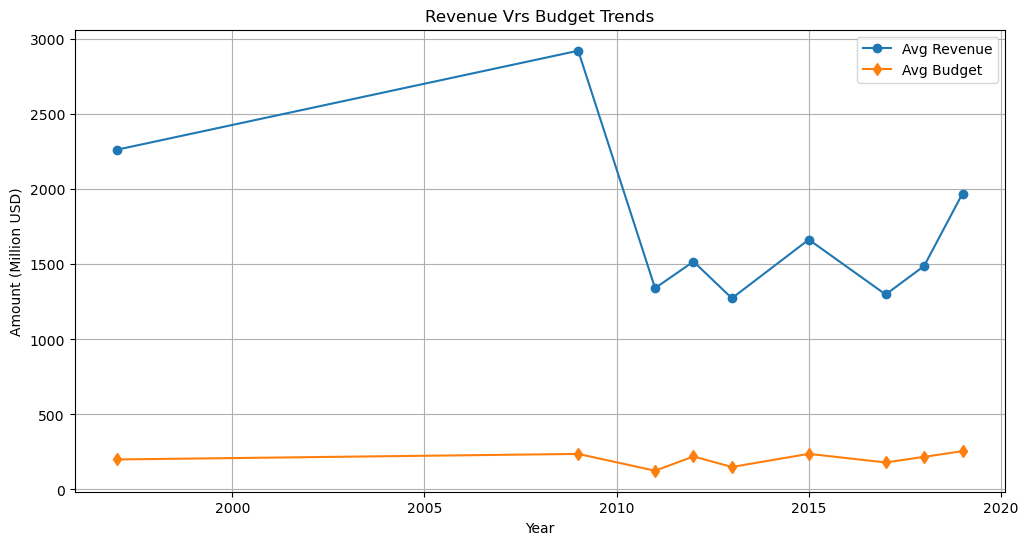

In [23]:


#groupong by year
reordered_df['year'] = reordered_df['release_date'].dt.year
df_grouped_by_year = reordered_df.groupby('year')[['revenue_musd', 'budget_musd']].mean()

fig, ax = plt.subplots(figsize=(12, 6))
df_grouped_by_year = df_grouped_by_year.sort_values('year')
ax.plot(df_grouped_by_year.index, df_grouped_by_year['revenue_musd'], label='Avg Revenue', marker='o')
ax.plot(df_grouped_by_year.index, df_grouped_by_year['budget_musd'], label='Avg Budget', marker='d')
ax.set_ylabel('Amount (Million USD)')
ax.set_xlabel('Year')
ax.set_title('Revenue Vrs Budget Trends')
ax.legend()
ax.grid(True)

### ROI Distribution By Genre

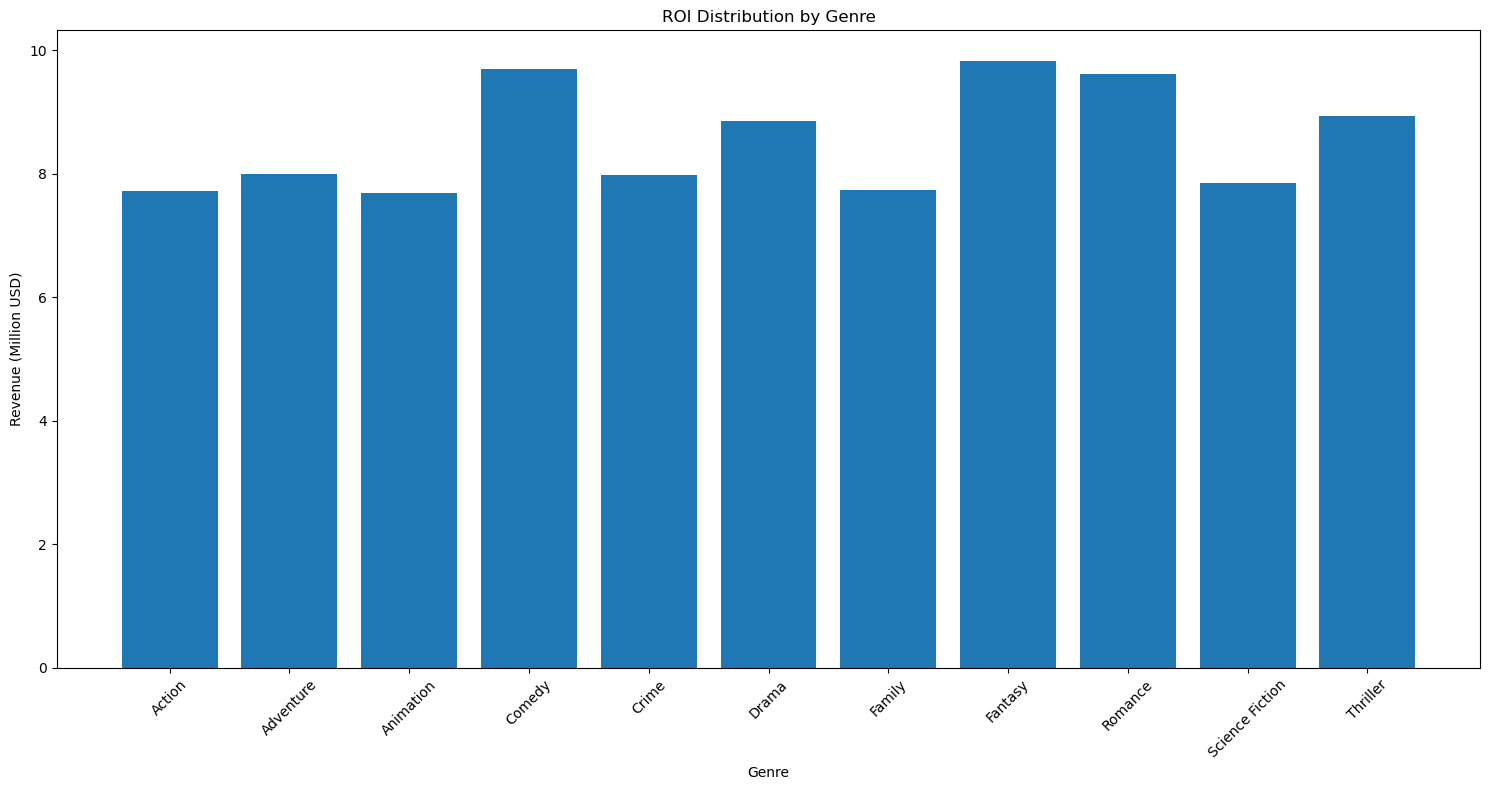

In [29]:
reordered_df['genres_list'] = reordered_df['genres'].str.split('|')
df_exploded = reordered_df.explode('genres_list')
reordered_df_with_roi = cal_roi(df_exploded)
highest_roi_by_genre = rank_movies_with_col(reordered_df_with_roi, 'roi_musd')
highest_roi_by_genre = highest_roi_by_genre.groupby("genres_list")['roi_musd'].mean()


fig, ax = plt.subplots(figsize=(15,8))
ax.bar(highest_roi_by_genre.index, highest_roi_by_genre.values)
ax.set_ylabel('Revenue (Million USD)')
ax.set_xlabel('Genre')
ax.set_title('ROI Distribution by Genre')
# ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Popularity Vrs Rating


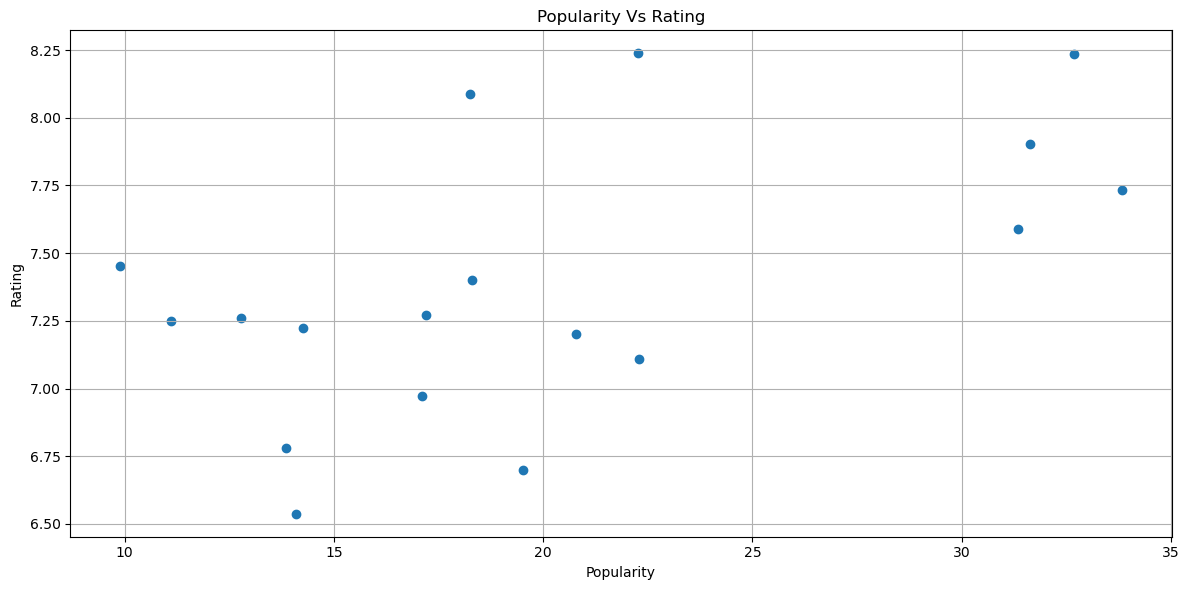

In [25]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(reordered_df['popularity'], reordered_df['vote_average'])
ax.set_ylabel('Rating')
ax.set_xlabel('Popularity')
ax.set_title('Popularity Vs Rating')
ax.grid(True)
plt.tight_layout()
plt.show()

### Yearly Trends in Box Office Perfomance

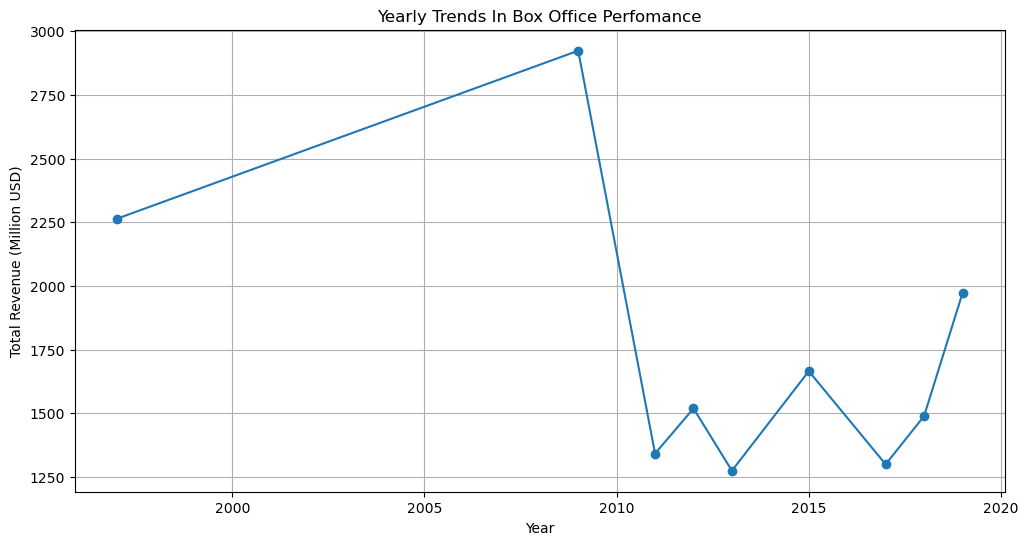

In [26]:
reordered_df['year'] = reordered_df['release_date'].dt.year
fig, ax = plt.subplots(figsize=(12, 6))
df_grouped_by_year = df_grouped_by_year.sort_values('year')
ax.plot(df_grouped_by_year.index, df_grouped_by_year['revenue_musd'], label='Avg Revenue', marker='o')
ax.set_ylabel('Total Revenue (Million USD)')
ax.set_xlabel('Year')
ax.set_title('Yearly Trends In Box Office Perfomance')
ax.grid(True)

### Comparison of Franchise vs. Standalone Success 

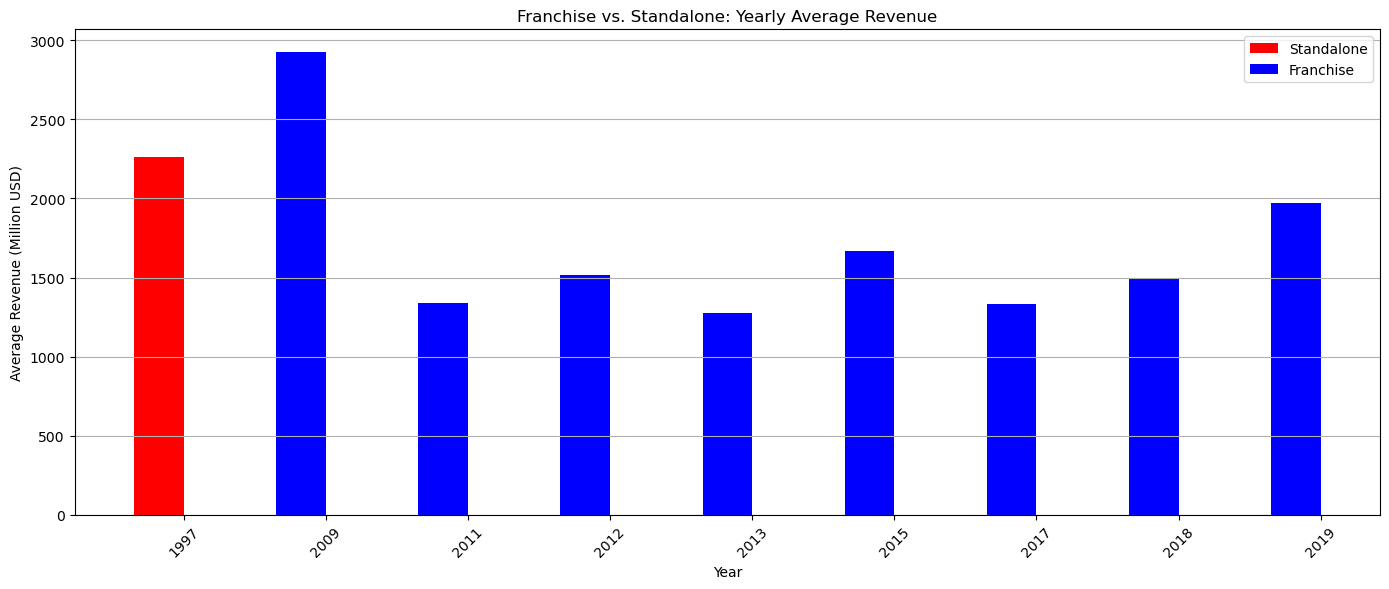

In [27]:
reordered_df['collection_type'] = reordered_df['belongs_to_collection'].apply(
        lambda x: 'Standalone' if pd.isna(x) else 'Franchise'
    )

grouped = reordered_df.groupby(['year', 'collection_type'])[['budget_musd', 'revenue_musd']].mean().reset_index()
pivot_revenue = grouped.pivot(index='year', columns='collection_type', values='revenue_musd')
pivot_budget = grouped.pivot(index='year', columns='collection_type', values='budget_musd')

pivot_revenue = pivot_revenue.sort_index()
pivot_budget = pivot_budget.sort_index()


years = pivot_revenue.index
x = np.arange(len(years))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 6))

ax.bar(x - width/2, pivot_revenue['Standalone'], width=width, label='Standalone', color='red')
ax.bar(x - width/2, pivot_revenue['Franchise'], width=width, label='Franchise', color='blue')

ax.set_xlabel('Year')
ax.set_ylabel('Average Revenue (Million USD)')
ax.set_title('Franchise vs. Standalone: Yearly Average Revenue')
ax.set_xticks(x)
ax.set_xticklabels(years, rotation=45)
ax.legend()
ax.grid(axis='y')
plt.tight_layout()
plt.show()
